# 第7章: 単語ベクトル
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

## 60. 単語ベクトルの読み込みと表示
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [23]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('files/GoogleNews-vectors-negative300.bin', binary=True)

In [104]:
united_states_vector = model.get_vector('United_States')

## 61. 単語の類似度
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [105]:
us_vector = model.get_vector('U.S.')

In [106]:
def cosine_similarity(a,b):
    return np.dot(a,b)/(np.linalg.norm(a, ord=2)*np.linalg.norm(b, ord=2))


In [107]:
cosine_similarity(united_states_vector,us_vector)
# model.similarity('United_States',"U.S.")

0.7310775

## 62. 類似度の高い単語10件
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [93]:
similarities = [cosine_similarity(vector,united_states_vector) for vector in model.vectors]

In [101]:
np.array(model.index2word)[np.argsort(similarities)[::-1][:10]]

array(['United_States', 'Unites_States', 'Untied_States', 'United_Sates',
       'U.S.', 'theUnited_States', 'America', 'UnitedStates', 'Europe',
       'countries'], dtype='<U98')

In [ ]:
# model.most_similar("United_States",topn=10)

## 63. 加法構成性によるアナロジー
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．

In [109]:
vec = model.get_vector('Spain') -  model.get_vector('Madrid') + model.get_vector('Athens')
similarities2 = [cosine_similarity(vector,vec) for vector in model.vectors]
print(np.array(model.index2word)[np.argsort(similarities2)[::-1][:10]])


array(['Athens', 'Greece', 'Aristeidis_Grigoriadis', 'Ioannis_Drymonakos',
       'Greeks', 'Ioannis_Christou', 'Hrysopiyi_Devetzi', 'Iraklion',
       'Greek', 'Athens_Greece'], dtype='<U98')

In [111]:
print(sorted(similarities2)[::-1][:10])

[0.7528455, 0.66854715, 0.54957783, 0.53614575, 0.5351787, 0.5330226, 0.50884897, 0.5059265, 0.5040616, 0.50341094]


In [ ]:
# model.most_similar(positive=['Spain','Athens'],negative=['Madrid'],topn=10)

## 64. アナロジーデータでの実験
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [25]:
from dataclasses import dataclass
@dataclass
class Word:
    word1: str = ""
    word2: str = ""
    word3: str = ""
    word4: str = ""
    @property
    def vec1(self):
        return model.get_vector(self.word1)
    
    @property
    def vec2(self):
        return model.get_vector(self.word2)
    
    @property
    def vec3(self):
        return model.get_vector(self.word3)
    
    @property
    def vec4(self):
        return model.get_vector(self.word4)
    
    def __repr__(self):
        return f'{self.word1} {self.word2} {self.word3} {self.word4}'



In [ ]:
import csv

with open('files/evaluate-words.txt') as f:
    # headerは飛ばす
    f.readline()
    reader = csv.DictReader(f,delimiter=' ',fieldnames=['word1','word2','word3','word4',])
    for row in reader:
        word = Word(row['word1'],row['word2'],row['word3'],row['word4'])
        try:
            print(f"{word.word2} - {word.word1} + {word.word3} , {model.most_similar(positive=[word.vec2,word.vec3],negative=[word.vec1],topn=1)[0]}")
        except:
            continue

Greece - Athens + Baghdad , ('Baghdad', 0.7489826679229736)
Greece - Athens + Bangkok , ('Bangkok', 0.7431141138076782)
Greece - Athens + Beijing , ('China', 0.7186591625213623)
Greece - Athens + Berlin , ('Germany', 0.6720892786979675)
Greece - Athens + Bern , ('Bern', 0.6902341842651367)
Greece - Athens + Cairo , ('Egypt', 0.7626821398735046)
Greece - Athens + Canberra , ('Canberra', 0.7407206892967224)
Greece - Athens + Hanoi , ('Hanoi', 0.7509901523590088)
Greece - Athens + Havana , ('Havana', 0.7262827754020691)
Greece - Athens + Helsinki , ('Helsinki', 0.7235296964645386)
Greece - Athens + Islamabad , ('Islamabad', 0.7821410894393921)
Greece - Athens + Kabul , ('Kabul', 0.7715259790420532)
Greece - Athens + London , ('London', 0.5891345143318176)
Greece - Athens + Madrid , ('Spain', 0.7145949006080627)
Greece - Athens + Moscow , ('Russia', 0.7455828189849854)
Greece - Athens + Oslo , ('Oslo', 0.7312972545623779)
Greece - Athens + Ottawa , ('Ottawa', 0.6877975463867188)
Greece - A

Egypt - Cairo + Oslo , ('Oslo', 0.748042106628418)
Egypt - Cairo + Ottawa , ('Ottawa', 0.7176220417022705)
Egypt - Cairo + Paris , ('France', 0.6924591660499573)
Egypt - Cairo + Rome , ('Italy', 0.6706969738006592)
Egypt - Cairo + Stockholm , ('Sweden', 0.7424593567848206)
Egypt - Cairo + Tehran , ('Iran', 0.8797544240951538)
Egypt - Cairo + Tokyo , ('Japan', 0.7807725071907043)
Egypt - Cairo + Athens , ('Greece', 0.7239887714385986)
Egypt - Cairo + Baghdad , ('Baghdad', 0.7566509246826172)
Egypt - Cairo + Bangkok , ('Thailand', 0.8332600593566895)
Egypt - Cairo + Beijing , ('China', 0.7976171970367432)
Egypt - Cairo + Berlin , ('Germany', 0.6881570816040039)
Egypt - Cairo + Bern , ('Bern', 0.7276052832603455)
Australia - Canberra + Hanoi , ('Hanoi', 0.7349317073822021)
Australia - Canberra + Havana , ('Havana', 0.7401776313781738)
Australia - Canberra + Helsinki , ('Helsinki', 0.7440007328987122)
Australia - Canberra + Islamabad , ('Pakistan', 0.7668275833129883)
Australia - Canberra 

Afghanistan - Kabul + Bern , ('Bern', 0.6224255561828613)
Afghanistan - Kabul + Cairo , ('Egypt', 0.6356440782546997)
Afghanistan - Kabul + Canberra , ('Canberra', 0.6914789080619812)
Afghanistan - Kabul + Hanoi , ('Vietnam', 0.7308458089828491)
Afghanistan - Kabul + Havana , ('Cuba', 0.7044931650161743)
Afghanistan - Kabul + Helsinki , ('Helsinki', 0.6581889986991882)
Afghanistan - Kabul + Islamabad , ('Pakistan', 0.7344183921813965)
England - London + Madrid , ('Madrid', 0.6747599840164185)
England - London + Moscow , ('Russia', 0.6954342126846313)
England - London + Oslo , ('Oslo', 0.6974025368690491)
England - London + Ottawa , ('Ottawa', 0.6787282228469849)
England - London + Paris , ('France', 0.6788668632507324)
England - London + Rome , ('Rome', 0.6640968918800354)
England - London + Stockholm , ('Sweden', 0.703800618648529)
England - London + Tehran , ('Tehran', 0.7741603851318359)
England - London + Tokyo , ('Japan', 0.7373722791671753)
England - London + Athens , ('Athens', 

Italy - Rome + Athens , ('Greece', 0.6569706201553345)
Italy - Rome + Baghdad , ('Baghdad', 0.7674493789672852)
Italy - Rome + Bangkok , ('Thailand', 0.7607450485229492)
Italy - Rome + Beijing , ('China', 0.746962308883667)
Italy - Rome + Berlin , ('Germany', 0.7864465117454529)
Italy - Rome + Bern , ('Bern', 0.7165793776512146)
Italy - Rome + Cairo , ('Egypt', 0.7065223455429077)
Italy - Rome + Canberra , ('Canberra', 0.754654049873352)
Italy - Rome + Hanoi , ('Hanoi', 0.7708350419998169)
Italy - Rome + Havana , ('Havana', 0.7370606660842896)
Italy - Rome + Helsinki , ('Finland', 0.7538447380065918)
Italy - Rome + Islamabad , ('Islamabad', 0.782055139541626)
Italy - Rome + Kabul , ('Kabul', 0.7816788554191589)
Italy - Rome + London , ('London', 0.6164987087249756)
Italy - Rome + Madrid , ('Spain', 0.7485604286193848)
Italy - Rome + Moscow , ('Russia', 0.7712365388870239)
Italy - Rome + Oslo , ('Oslo', 0.7458958029747009)
Italy - Rome + Ottawa , ('Ottawa', 0.7155741453170776)
Italy - R

Ghana - Accra + Berlin , ('Germany', 0.693964958190918)
Ghana - Accra + Bern , ('Bern', 0.7007034420967102)
Ghana - Accra + Bishkek , ('Bishkek', 0.7721447348594666)
Ghana - Accra + Bratislava , ('Slovakia', 0.7549647688865662)
Ghana - Accra + Brussels , ('EU', 0.6533179879188538)
Ghana - Accra + Bucharest , ('Romania', 0.7892204523086548)
Ghana - Accra + Budapest , ('Hungary', 0.76300048828125)
Ghana - Accra + Bujumbura , ('Bujumbura', 0.7739633917808533)
Ghana - Accra + Cairo , ('Egypt', 0.7316036224365234)
Ghana - Accra + Canberra , ('Australia', 0.7511561512947083)
Ghana - Accra + Caracas , ('Venezuela', 0.7515694499015808)
Ghana - Accra + Chisinau , ('Chisinau', 0.7693170309066772)
Ghana - Accra + Conakry , ('Conakry', 0.807256817817688)
Ghana - Accra + Copenhagen , ('Copenhagen', 0.7476184964179993)
Ghana - Accra + Dakar , ('Dakar', 0.7515448331832886)
Ghana - Accra + Damascus , ('Syria', 0.7329688668251038)
Ghana - Accra + Dhaka , ('Bangladesh', 0.8021045327186584)
Ghana - Accra

Turkey - Ankara + Hanoi , ('Hanoi', 0.7442710399627686)
Madagascar - Antananarivo + Apia , ('Apia', 0.6576848030090332)
Madagascar - Antananarivo + Ashgabat , ('Turkmenistan', 0.6709073781967163)
Madagascar - Antananarivo + Asmara , ('Asmara', 0.625490128993988)
Madagascar - Antananarivo + Astana , ('Astana', 0.6958339214324951)
Madagascar - Antananarivo + Athens , ('Athens', 0.5548495650291443)
Madagascar - Antananarivo + Baghdad , ('Baghdad', 0.6119450926780701)
Madagascar - Antananarivo + Baku , ('Azerbaijan', 0.6674003601074219)
Madagascar - Antananarivo + Bamako , ('Bamako', 0.6422666907310486)
Madagascar - Antananarivo + Bangkok , ('Thailand', 0.6337445974349976)
Madagascar - Antananarivo + Banjul , ('Banjul', 0.6589401364326477)
Madagascar - Antananarivo + Beijing , ('China', 0.5874930024147034)
Madagascar - Antananarivo + Beirut , ('Beirut', 0.6003814935684204)
Madagascar - Antananarivo + Belgrade , ('Belgrade', 0.5832297801971436)
Madagascar - Antananarivo + Belmopan , ('Belmo

Eritrea - Asmara + Belmopan , ('Belmopan', 0.782378077507019)
Eritrea - Asmara + Berlin , ('Berlin', 0.7088388204574585)
Eritrea - Asmara + Bern , ('Bern', 0.746942400932312)
Eritrea - Asmara + Bishkek , ('Bishkek', 0.8201079368591309)
Eritrea - Asmara + Bratislava , ('Bratislava', 0.7742104530334473)
Eritrea - Asmara + Brussels , ('Brussels', 0.7238006591796875)
Eritrea - Asmara + Bucharest , ('Romania', 0.7720363736152649)
Eritrea - Asmara + Budapest , ('Hungary', 0.7348689436912537)
Eritrea - Asmara + Bujumbura , ('Bujumbura', 0.8272058963775635)
Eritrea - Asmara + Cairo , ('Egypt', 0.7373647689819336)
Eritrea - Asmara + Canberra , ('Canberra', 0.7719380259513855)
Eritrea - Asmara + Caracas , ('Caracas', 0.7668167352676392)
Eritrea - Asmara + Chisinau , ('Chisinau', 0.8218079805374146)
Eritrea - Asmara + Conakry , ('Conakry', 0.8466664552688599)
Eritrea - Asmara + Copenhagen , ('Copenhagen', 0.7870495915412903)
Eritrea - Asmara + Dakar , ('Dakar', 0.7983235120773315)
Eritrea - Asmar

Iraq - Baghdad + Funafuti , ('Funafuti', 0.6762881875038147)
Iraq - Baghdad + Gaborone , ('Gaborone', 0.7718242406845093)
Iraq - Baghdad + Georgetown , ('Georgetown', 0.6883218288421631)
Iraq - Baghdad + Hanoi , ('Hanoi', 0.7305172085762024)
Iraq - Baghdad + Harare , ('Harare', 0.7655274868011475)
Iraq - Baghdad + Havana , ('Havana', 0.70512455701828)
Iraq - Baghdad + Helsinki , ('Helsinki', 0.7304091453552246)
Iraq - Baghdad + Islamabad , ('Pakistan', 0.7500633597373962)
Iraq - Baghdad + Jakarta , ('Jakarta', 0.7657710313796997)
Iraq - Baghdad + Kabul , ('Afghanistan', 0.7953289151191711)
Iraq - Baghdad + Kampala , ('Kampala', 0.7646312713623047)
Azerbaijan - Baku + Bamako , ('Bamako', 0.8423134684562683)
Azerbaijan - Baku + Bangkok , ('Thailand', 0.8242149353027344)
Azerbaijan - Baku + Banjul , ('Banjul', 0.8412023782730103)
Azerbaijan - Baku + Beijing , ('China', 0.7989833354949951)
Azerbaijan - Baku + Beirut , ('Beirut', 0.8078142404556274)
Azerbaijan - Baku + Belgrade , ('Belgrade

Gambia - Banjul + Bratislava , ('Bratislava', 0.7235411405563354)
Gambia - Banjul + Brussels , ('Brussels', 0.6509727835655212)
Gambia - Banjul + Bucharest , ('Romania', 0.724659264087677)
Gambia - Banjul + Budapest , ('Hungary', 0.7004644274711609)
Gambia - Banjul + Bujumbura , ('Bujumbura', 0.7685803174972534)
Gambia - Banjul + Cairo , ('Egypt', 0.6691769957542419)
Gambia - Banjul + Canberra , ('Canberra', 0.716035783290863)
Gambia - Banjul + Caracas , ('Venezuela', 0.7196117639541626)
Gambia - Banjul + Chisinau , ('Moldova', 0.764654278755188)
Gambia - Banjul + Conakry , ('Conakry', 0.8003700971603394)
Gambia - Banjul + Copenhagen , ('Copenhagen', 0.7318161725997925)
Gambia - Banjul + Dakar , ('Dakar', 0.7386571168899536)
Gambia - Banjul + Damascus , ('Damascus', 0.6792159676551819)
Gambia - Banjul + Dhaka , ('Bangladesh', 0.7560032606124878)
Gambia - Banjul + Doha , ('Doha', 0.7483518719673157)
Gambia - Banjul + Dublin , ('Ireland', 0.7012227177619934)
Gambia - Banjul + Dushanbe , 

Serbia - Belgrade + Harare , ('Harare', 0.8188718557357788)
Serbia - Belgrade + Havana , ('Havana', 0.7598358988761902)
Serbia - Belgrade + Helsinki , ('Helsinki', 0.7671212553977966)
Serbia - Belgrade + Islamabad , ('Pakistan', 0.8205616474151611)
Serbia - Belgrade + Jakarta , ('Jakarta', 0.8137522339820862)
Serbia - Belgrade + Kabul , ('Kabul', 0.7873711585998535)
Serbia - Belgrade + Kampala , ('Kampala', 0.8200153708457947)
Serbia - Belgrade + Kathmandu , ('Kathmandu', 0.7750753164291382)
Serbia - Belgrade + Khartoum , ('Khartoum', 0.8183989524841309)
Serbia - Belgrade + Kiev , ('Ukraine', 0.8319912552833557)
Serbia - Belgrade + Kigali , ('Kigali', 0.7961015701293945)
Serbia - Belgrade + Kingston , ('Kingston', 0.6725809574127197)
Serbia - Belgrade + Libreville , ('Libreville', 0.8383704423904419)
Serbia - Belgrade + Lilongwe , ('Lilongwe', 0.8305451273918152)
Belize - Belmopan + Berlin , ('Berlin', 0.7145541906356812)
Belize - Belmopan + Bern , ('Bern', 0.7228333950042725)
Belize -

Kyrgyzstan - Bishkek + Brussels , ('Brussels', 0.6651185750961304)
Kyrgyzstan - Bishkek + Bucharest , ('Romania', 0.7332121133804321)
Kyrgyzstan - Bishkek + Budapest , ('Hungary', 0.7112554311752319)
Kyrgyzstan - Bishkek + Bujumbura , ('Bujumbura', 0.7896765470504761)
Kyrgyzstan - Bishkek + Cairo , ('Egypt', 0.7403402924537659)
Kyrgyzstan - Bishkek + Canberra , ('Canberra', 0.7228847742080688)
Kyrgyzstan - Bishkek + Caracas , ('Venezuela', 0.7510349750518799)
Kyrgyzstan - Bishkek + Chisinau , ('Moldova', 0.7590634226799011)
Kyrgyzstan - Bishkek + Conakry , ('Conakry', 0.8066279888153076)
Kyrgyzstan - Bishkek + Copenhagen , ('Copenhagen', 0.7466135025024414)
Kyrgyzstan - Bishkek + Dakar , ('Dakar', 0.7611579895019531)
Kyrgyzstan - Bishkek + Damascus , ('Syria', 0.7354940176010132)
Kyrgyzstan - Bishkek + Dhaka , ('Bangladesh', 0.7922846078872681)
Kyrgyzstan - Bishkek + Doha , ('Doha', 0.7560076117515564)
Kyrgyzstan - Bishkek + Dublin , ('Dublin', 0.6883800029754639)
Kyrgyzstan - Bishkek 

Romania - Bucharest + Doha , ('Doha', 0.7996354699134827)
Romania - Bucharest + Dublin , ('Ireland', 0.774689793586731)
Romania - Bucharest + Dushanbe , ('Dushanbe', 0.8021047115325928)
Romania - Bucharest + Funafuti , ('Funafuti', 0.7424023151397705)
Romania - Bucharest + Gaborone , ('Gaborone', 0.8207318782806396)
Romania - Bucharest + Georgetown , ('Georgetown', 0.768181562423706)
Romania - Bucharest + Hanoi , ('Hanoi', 0.7678514719009399)
Romania - Bucharest + Harare , ('Harare', 0.8191096782684326)
Romania - Bucharest + Havana , ('Cuba', 0.7774407267570496)
Romania - Bucharest + Helsinki , ('Helsinki', 0.7565022706985474)
Romania - Bucharest + Islamabad , ('Pakistan', 0.8070960640907288)
Romania - Bucharest + Jakarta , ('Indonesia', 0.8482982516288757)
Romania - Bucharest + Kabul , ('Kabul', 0.7921989560127258)
Romania - Bucharest + Kampala , ('Kampala', 0.807390570640564)
Romania - Bucharest + Kathmandu , ('Nepal', 0.7978942394256592)
Romania - Bucharest + Khartoum , ('Khartoum',

Egypt - Cairo + Kingston , ('Kingston', 0.6789272427558899)
Egypt - Cairo + Libreville , ('Libreville', 0.8145501613616943)
Egypt - Cairo + Lilongwe , ('Lilongwe', 0.8204861283302307)
Egypt - Cairo + Lima , ('Lima', 0.6761198043823242)
Egypt - Cairo + Lisbon , ('Lisbon', 0.7047401666641235)
Egypt - Cairo + Ljubljana , ('Ljubljana', 0.813530683517456)
Egypt - Cairo + London , ('London', 0.6300549507141113)
Egypt - Cairo + Luanda , ('Luanda', 0.8117638230323792)
Egypt - Cairo + Lusaka , ('Lusaka', 0.8003017902374268)
Egypt - Cairo + Madrid , ('Spain', 0.7408467531204224)
Egypt - Cairo + Managua , ('Managua', 0.793235719203949)
Egypt - Cairo + Manama , ('Manama', 0.7783944606781006)
Egypt - Cairo + Manila , ('Philippines', 0.7896880507469177)
Australia - Canberra + Caracas , ('Caracas', 0.7532510757446289)
Australia - Canberra + Chisinau , ('Chisinau', 0.7845876216888428)
Australia - Canberra + Conakry , ('Conakry', 0.8291246294975281)
Australia - Canberra + Copenhagen , ('Copenhagen', 0.

Guinea - Conakry + Copenhagen , ('Copenhagen', 0.5981720685958862)
Guinea - Conakry + Dakar , ('Dakar', 0.5600165128707886)
Guinea - Conakry + Damascus , ('Damascus', 0.5007058382034302)
Guinea - Conakry + Dhaka , ('Bangladesh', 0.6098989248275757)
Guinea - Conakry + Doha , ('Doha', 0.6097303628921509)
Guinea - Conakry + Dublin , ('Ireland', 0.5470985174179077)
Guinea - Conakry + Dushanbe , ('Dushanbe', 0.5860722064971924)
Guinea - Conakry + Funafuti , ('Funafuti', 0.5350327491760254)
Guinea - Conakry + Gaborone , ('Botswana', 0.5711274147033691)
Guinea - Conakry + Georgetown , ('Georgetown', 0.5583925843238831)
Guinea - Conakry + Hanoi , ('Hanoi', 0.5797516107559204)
Guinea - Conakry + Harare , ('Zimbabwe', 0.6287766098976135)
Guinea - Conakry + Havana , ('Cuba', 0.5543761253356934)
Guinea - Conakry + Helsinki , ('Helsinki', 0.5432519912719727)
Guinea - Conakry + Islamabad , ('Pakistan', 0.6173446178436279)
Guinea - Conakry + Jakarta , ('Indonesia', 0.6755855083465576)
Guinea - Conakr

Syria - Damascus + Khartoum , ('Sudan', 0.8465713262557983)
Syria - Damascus + Kiev , ('Ukraine', 0.8296852111816406)
Syria - Damascus + Kigali , ('Kigali', 0.825657844543457)
Syria - Damascus + Kingston , ('Kingston', 0.696381688117981)
Syria - Damascus + Libreville , ('Libreville', 0.8547663688659668)
Syria - Damascus + Lilongwe , ('Lilongwe', 0.8519409894943237)
Syria - Damascus + Lima , ('Lima', 0.7200480699539185)
Syria - Damascus + Lisbon , ('Lisbon', 0.7372965812683105)
Syria - Damascus + Ljubljana , ('Ljubljana', 0.8386346697807312)
Syria - Damascus + London , ('London', 0.6950238943099976)
Syria - Damascus + Luanda , ('Luanda', 0.8523519039154053)
Syria - Damascus + Lusaka , ('Lusaka', 0.8354655504226685)
Syria - Damascus + Madrid , ('Madrid', 0.7604970932006836)
Syria - Damascus + Managua , ('Managua', 0.8355295658111572)
Syria - Damascus + Manama , ('Manama', 0.8206148147583008)
Syria - Damascus + Manila , ('Manila', 0.7958623766899109)
Syria - Damascus + Maputo , ('Maputo',

Ireland - Dublin + Muscat , ('Muscat', 0.7943965196609497)
Ireland - Dublin + Nairobi , ('Nairobi', 0.8125760555267334)
Ireland - Dublin + Nassau , ('Nassau', 0.7838327288627625)
Ireland - Dublin + Niamey , ('Niamey', 0.8643248081207275)
Tajikistan - Dushanbe + Funafuti , ('Funafuti', 0.691840410232544)
Tajikistan - Dushanbe + Gaborone , ('Gaborone', 0.7596445083618164)
Tajikistan - Dushanbe + Georgetown , ('Georgetown', 0.6988738775253296)
Tajikistan - Dushanbe + Hanoi , ('Hanoi', 0.709496259689331)
Tajikistan - Dushanbe + Harare , ('Zimbabwe', 0.7991394996643066)
Tajikistan - Dushanbe + Havana , ('Cuba', 0.7338777780532837)
Tajikistan - Dushanbe + Helsinki , ('Helsinki', 0.7004081010818481)
Tajikistan - Dushanbe + Islamabad , ('Pakistan', 0.7869052886962891)
Tajikistan - Dushanbe + Jakarta , ('Indonesia', 0.7947396039962769)
Tajikistan - Dushanbe + Kabul , ('Kabul', 0.731321394443512)
Tajikistan - Dushanbe + Kampala , ('Uganda', 0.7993236780166626)
Tajikistan - Dushanbe + Kathmandu ,

Guyana - Georgetown + Kathmandu , ('Kathmandu', 0.7173584699630737)
Guyana - Georgetown + Khartoum , ('Khartoum', 0.7449219226837158)
Guyana - Georgetown + Kiev , ('Kiev', 0.708777666091919)
Guyana - Georgetown + Kigali , ('Kigali', 0.7632916569709778)
Guyana - Georgetown + Kingston , ('Guyana', 0.7082468271255493)
Guyana - Georgetown + Libreville , ('Libreville', 0.7783171534538269)
Guyana - Georgetown + Lilongwe , ('Lilongwe', 0.7862101197242737)
Guyana - Georgetown + Lima , ('Lima', 0.6269869804382324)
Guyana - Georgetown + Lisbon , ('Lisbon', 0.6195889711380005)
Guyana - Georgetown + Ljubljana , ('Ljubljana', 0.7109764218330383)
Guyana - Georgetown + London , ('Guyana', 0.6067256927490234)
Guyana - Georgetown + Luanda , ('Luanda', 0.7988569140434265)
Guyana - Georgetown + Lusaka , ('Lusaka', 0.7793281674385071)
Guyana - Georgetown + Madrid , ('Madrid', 0.6391295790672302)
Guyana - Georgetown + Managua , ('Managua', 0.7631133198738098)
Guyana - Georgetown + Manama , ('Manama', 0.714

Cuba - Havana + Moscow , ('Russia', 0.8117910623550415)
Cuba - Havana + Muscat , ('Muscat', 0.7485816478729248)
Cuba - Havana + Nairobi , ('Kenya', 0.8204931020736694)
Cuba - Havana + Nassau , ('Nassau', 0.7500582933425903)
Cuba - Havana + Niamey , ('Niamey', 0.8243229985237122)
Cuba - Havana + Nicosia , ('Nicosia', 0.7333000302314758)
Cuba - Havana + Nouakchott , ('Nouakchott', 0.8086056113243103)
Cuba - Havana + Nuuk , ('Nuuk', 0.8357491493225098)
Cuba - Havana + Oslo , ('Oslo', 0.7593522667884827)
Cuba - Havana + Ottawa , ('Ottawa', 0.7225258350372314)
Cuba - Havana + Paramaribo , ('Paramaribo', 0.8148518800735474)
Cuba - Havana + Paris , ('France', 0.6506661772727966)
Finland - Helsinki + Islamabad , ('Islamabad', 0.7525752186775208)
Finland - Helsinki + Jakarta , ('Indonesia', 0.7673929929733276)
Finland - Helsinki + Kabul , ('Kabul', 0.7565009593963623)
Finland - Helsinki + Kampala , ('Kampala', 0.756188154220581)
Finland - Helsinki + Kathmandu , ('Kathmandu', 0.7320325374603271)

Afghanistan - Kabul + Khartoum , ('Sudan', 0.7616786956787109)
Afghanistan - Kabul + Kiev , ('Ukraine', 0.7070105075836182)
Afghanistan - Kabul + Kigali , ('Rwanda', 0.7125406265258789)
Afghanistan - Kabul + Kingston , ('Kingston', 0.561115562915802)
Afghanistan - Kabul + Libreville , ('Libreville', 0.7368304133415222)
Afghanistan - Kabul + Lilongwe , ('Lilongwe', 0.7309373617172241)
Afghanistan - Kabul + Lima , ('Lima', 0.6026937961578369)
Afghanistan - Kabul + Lisbon , ('Lisbon', 0.6098562479019165)
Afghanistan - Kabul + Ljubljana , ('Ljubljana', 0.7130188941955566)
Afghanistan - Kabul + London , ('London', 0.5444457530975342)
Afghanistan - Kabul + Luanda , ('Luanda', 0.7211594581604004)
Afghanistan - Kabul + Lusaka , ('Lusaka', 0.7034305334091187)
Afghanistan - Kabul + Madrid , ('Madrid', 0.6382501721382141)
Afghanistan - Kabul + Managua , ('Managua', 0.7020732164382935)
Afghanistan - Kabul + Manama , ('Manama', 0.6803669929504395)
Afghanistan - Kabul + Manila , ('Philippines', 0.66

Sudan - Khartoum + Montevideo , ('Montevideo', 0.7586143016815186)
Sudan - Khartoum + Moscow , ('Russia', 0.7764825224876404)
Sudan - Khartoum + Muscat , ('Muscat', 0.7433884739875793)
Sudan - Khartoum + Nairobi , ('Kenya', 0.767641007900238)
Sudan - Khartoum + Nassau , ('Nassau', 0.7786407470703125)
Sudan - Khartoum + Niamey , ('Niamey', 0.8293954133987427)
Sudan - Khartoum + Nicosia , ('Nicosia', 0.7623491883277893)
Sudan - Khartoum + Nouakchott , ('Nouakchott', 0.8064730167388916)
Sudan - Khartoum + Nuuk , ('Nuuk', 0.8303458094596863)
Sudan - Khartoum + Oslo , ('Oslo', 0.7455571293830872)
Sudan - Khartoum + Ottawa , ('Ottawa', 0.7287869453430176)
Sudan - Khartoum + Paramaribo , ('Paramaribo', 0.8217501640319824)
Sudan - Khartoum + Paris , ('Paris', 0.6496483087539673)
Sudan - Khartoum + Podgorica , ('Podgorica', 0.8121002912521362)
Sudan - Khartoum + Quito , ('Quito', 0.7722389698028564)
Sudan - Khartoum + Rabat , ('Rabat', 0.7613117694854736)
Sudan - Khartoum + Riga , ('Riga', 0.75

Gabon - Libreville + Lima , ('Lima', 0.5915387868881226)
Gabon - Libreville + Lisbon , ('Lisbon', 0.5768500566482544)
Gabon - Libreville + Ljubljana , ('Ljubljana', 0.7137373685836792)
Gabon - Libreville + London , ('London', 0.5519507527351379)
Gabon - Libreville + Luanda , ('Luanda', 0.6972101330757141)
Gabon - Libreville + Lusaka , ('Lusaka', 0.6957193613052368)
Gabon - Libreville + Madrid , ('Madrid', 0.6216664910316467)
Gabon - Libreville + Managua , ('Managua', 0.7012231349945068)
Gabon - Libreville + Manama , ('Bahrain', 0.685780942440033)
Gabon - Libreville + Manila , ('Philippines', 0.6682683229446411)
Gabon - Libreville + Maputo , ('Mozambique', 0.7028591632843018)
Gabon - Libreville + Minsk , ('Minsk', 0.6994287967681885)
Gabon - Libreville + Mogadishu , ('Mogadishu', 0.7590509653091431)
Gabon - Libreville + Monrovia , ('Monrovia', 0.659581184387207)
Gabon - Libreville + Montevideo , ('Montevideo', 0.6340731978416443)
Gabon - Libreville + Moscow , ('Russia', 0.69399571418762

Portugal - Lisbon + Ottawa , ('Ottawa', 0.6782453656196594)
Portugal - Lisbon + Paramaribo , ('Paramaribo', 0.810158371925354)
Portugal - Lisbon + Paris , ('France', 0.6806440353393555)
Portugal - Lisbon + Podgorica , ('Podgorica', 0.7883696556091309)
Portugal - Lisbon + Quito , ('Quito', 0.7762875556945801)
Portugal - Lisbon + Rabat , ('Rabat', 0.7697286605834961)
Portugal - Lisbon + Riga , ('Latvia', 0.7013309597969055)
Portugal - Lisbon + Rome , ('Italy', 0.6602135300636292)
Portugal - Lisbon + Roseau , ('Roseau', 0.7610987424850464)
Portugal - Lisbon + Santiago , ('Santiago', 0.6804124712944031)
Portugal - Lisbon + Skopje , ('Skopje', 0.795324444770813)
Portugal - Lisbon + Sofia , ('Sofia', 0.7112359404563904)
Portugal - Lisbon + Stockholm , ('Sweden', 0.7375571727752686)
Portugal - Lisbon + Suva , ('Suva', 0.8218637704849243)
Portugal - Lisbon + Taipei , ('Taipei', 0.7644346952438354)
Portugal - Lisbon + Tallinn , ('Tallinn', 0.7601598501205444)
Portugal - Lisbon + Tashkent , ('Ta

Zambia - Lusaka + Managua , ('Managua', 0.7552708387374878)
Zambia - Lusaka + Manama , ('Manama', 0.7451414465904236)
Zambia - Lusaka + Manila , ('Philippines', 0.7389713525772095)
Zambia - Lusaka + Maputo , ('Mozambique', 0.7661365270614624)
Zambia - Lusaka + Minsk , ('Minsk', 0.7661492824554443)
Zambia - Lusaka + Mogadishu , ('Mogadishu', 0.8226405382156372)
Zambia - Lusaka + Monrovia , ('Monrovia', 0.7356881499290466)
Zambia - Lusaka + Montevideo , ('Montevideo', 0.7061605453491211)
Zambia - Lusaka + Moscow , ('Russia', 0.7639144659042358)
Zambia - Lusaka + Muscat , ('Muscat', 0.7262682914733887)
Zambia - Lusaka + Nairobi , ('Kenya', 0.8040318489074707)
Zambia - Lusaka + Nassau , ('Nassau', 0.7222572565078735)
Zambia - Lusaka + Niamey , ('Niamey', 0.7972534894943237)
Zambia - Lusaka + Nicosia , ('Nicosia', 0.6959271430969238)
Zambia - Lusaka + Nouakchott , ('Nouakchott', 0.7760454416275024)
Zambia - Lusaka + Nuuk , ('Nuuk', 0.8075165748596191)
Zambia - Lusaka + Oslo , ('Oslo', 0.716

Bahrain - Manama + Riga , ('Riga', 0.7421467304229736)
Bahrain - Manama + Rome , ('Rome', 0.7187458276748657)
Bahrain - Manama + Roseau , ('Roseau', 0.8106584548950195)
Bahrain - Manama + Santiago , ('Santiago', 0.6703068017959595)
Bahrain - Manama + Skopje , ('Skopje', 0.8138979077339172)
Bahrain - Manama + Sofia , ('Sofia', 0.7153369188308716)
Bahrain - Manama + Stockholm , ('Stockholm', 0.7613227963447571)
Bahrain - Manama + Suva , ('Suva', 0.7970200777053833)
Bahrain - Manama + Taipei , ('Taipei', 0.7512823343276978)
Bahrain - Manama + Tallinn , ('Tallinn', 0.7748098373413086)
Bahrain - Manama + Tashkent , ('Tashkent', 0.7517231702804565)
Bahrain - Manama + Tbilisi , ('Tbilisi', 0.8089250326156616)
Bahrain - Manama + Tegucigalpa , ('Tegucigalpa', 0.8290398120880127)
Bahrain - Manama + Tehran , ('Iran', 0.8146042227745056)
Bahrain - Manama + Thimphu , ('Thimphu', 0.7999990582466125)
Bahrain - Manama + Tirana , ('Tirana', 0.8002197742462158)
Bahrain - Manama + Tokyo , ('Tokyo', 0.744

Belarus - Minsk + Vaduz , ('Vaduz', 0.7535918951034546)
Belarus - Minsk + Valletta , ('Valletta', 0.7795624732971191)
Somalia - Mogadishu + Monrovia , ('Monrovia', 0.6698141098022461)
Somalia - Mogadishu + Montevideo , ('Montevideo', 0.660896897315979)
Somalia - Mogadishu + Moscow , ('Russia', 0.6779482364654541)
Somalia - Mogadishu + Muscat , ('Muscat', 0.6676756143569946)
Somalia - Mogadishu + Nairobi , ('Kenya', 0.66461181640625)
Somalia - Mogadishu + Nassau , ('Nassau', 0.6854238510131836)
Somalia - Mogadishu + Niamey , ('Niamey', 0.7447986602783203)
Somalia - Mogadishu + Nicosia , ('Nicosia', 0.6674584150314331)
Somalia - Mogadishu + Nouakchott , ('Nouakchott', 0.7067019939422607)
Somalia - Mogadishu + Nuuk , ('Nuuk', 0.7686329483985901)
Somalia - Mogadishu + Oslo , ('Oslo', 0.6829236149787903)
Somalia - Mogadishu + Ottawa , ('Ottawa', 0.6758915185928345)
Somalia - Mogadishu + Paramaribo , ('Paramaribo', 0.7355156540870667)
Somalia - Mogadishu + Paris , ('Paris', 0.587527871131897

Russia - Moscow + Rabat , ('Rabat', 0.8286397457122803)
Russia - Moscow + Riga , ('Riga', 0.7944146990776062)
Russia - Moscow + Rome , ('Rome', 0.7541685104370117)
Russia - Moscow + Roseau , ('Roseau', 0.8669790029525757)
Russia - Moscow + Santiago , ('Santiago', 0.7406371831893921)
Russia - Moscow + Skopje , ('Skopje', 0.8595964908599854)
Russia - Moscow + Sofia , ('Sofia', 0.7702938318252563)
Russia - Moscow + Stockholm , ('Stockholm', 0.8018872141838074)
Russia - Moscow + Suva , ('Suva', 0.871195375919342)
Russia - Moscow + Taipei , ('Taipei', 0.8143579959869385)
Russia - Moscow + Tallinn , ('Tallinn', 0.8346972465515137)
Russia - Moscow + Tashkent , ('Tashkent', 0.811076819896698)
Russia - Moscow + Tbilisi , ('Tbilisi', 0.8584576845169067)
Russia - Moscow + Tegucigalpa , ('Tegucigalpa', 0.8852505087852478)
Russia - Moscow + Tehran , ('Iran', 0.8936830163002014)
Russia - Moscow + Thimphu , ('Thimphu', 0.8712700605392456)
Russia - Moscow + Tirana , ('Tirana', 0.8526644706726074)
Russ

Bahamas - Nassau + Windhoek , ('Windhoek', 0.7742829322814941)
Bahamas - Nassau + Yerevan , ('Yerevan', 0.7587152719497681)
Bahamas - Nassau + Zagreb , ('Zagreb', 0.7659561634063721)
Niger - Niamey + Nicosia , ('Nicosia', 0.5646893978118896)
Niger - Niamey + Nouakchott , ('Niger', 0.6935707926750183)
Niger - Niamey + Nuuk , ('Nuuk', 0.6989994049072266)
Niger - Niamey + Oslo , ('Oslo', 0.5910390019416809)
Niger - Niamey + Ottawa , ('Ottawa', 0.5775713920593262)
Niger - Niamey + Paramaribo , ('Paramaribo', 0.6457594633102417)
Niger - Niamey + Paris , ('Niger', 0.4956914186477661)
Niger - Niamey + Podgorica , ('Podgorica', 0.6611543893814087)
Niger - Niamey + Quito , ('Quito', 0.5988453030586243)
Niger - Niamey + Rabat , ('Rabat', 0.6109618544578552)
Niger - Niamey + Riga , ('Riga', 0.5914238691329956)
Niger - Niamey + Rome , ('Rome', 0.556012749671936)
Niger - Niamey + Roseau , ('Roseau', 0.7243046164512634)
Niger - Niamey + Santiago , ('Santiago', 0.49245765805244446)
Niger - Niamey + S

Greenland - Nuuk + Taipei , ('Taipei', 0.6257274746894836)
Greenland - Nuuk + Tallinn , ('Tallinn', 0.6325638294219971)
Greenland - Nuuk + Tashkent , ('Tashkent', 0.601252019405365)
Greenland - Nuuk + Tbilisi , ('Tbilisi', 0.6779935359954834)
Greenland - Nuuk + Tegucigalpa , ('Tegucigalpa', 0.6990630626678467)
Greenland - Nuuk + Tehran , ('Tehran', 0.6878757476806641)
Greenland - Nuuk + Thimphu , ('Thimphu', 0.6613731980323792)
Greenland - Nuuk + Tirana , ('Tirana', 0.6417610049247742)
Greenland - Nuuk + Tokyo , ('Tokyo', 0.5990840196609497)
Greenland - Nuuk + Tripoli , ('Tripoli', 0.6259030103683472)
Greenland - Nuuk + Tunis , ('Tunis', 0.5961011648178101)
Greenland - Nuuk + Vaduz , ('Vaduz', 0.581404983997345)
Greenland - Nuuk + Valletta , ('Valletta', 0.6791016459465027)
Greenland - Nuuk + Vienna , ('Vienna', 0.5368196964263916)
Greenland - Nuuk + Vientiane , ('Vientiane', 0.6248775124549866)
Greenland - Nuuk + Vilnius , ('Vilnius', 0.5988903045654297)
Greenland - Nuuk + Warsaw , ('

Suriname - Paramaribo + Amman , ('Amman', 0.5835920572280884)
Suriname - Paramaribo + Ankara , ('Turkey', 0.6878089904785156)
Suriname - Paramaribo + Antananarivo , ('Antananarivo', 0.687629222869873)
Suriname - Paramaribo + Apia , ('Apia', 0.719489336013794)
France - Paris + Podgorica , ('Podgorica', 0.8487323522567749)
France - Paris + Quito , ('Quito', 0.8110418319702148)
France - Paris + Rabat , ('Rabat', 0.8104760646820068)
France - Paris + Riga , ('Riga', 0.7799767851829529)
France - Paris + Rome , ('Italy', 0.7115296125411987)
France - Paris + Roseau , ('Roseau', 0.8486465215682983)
France - Paris + Santiago , ('Santiago', 0.715510368347168)
France - Paris + Skopje , ('Skopje', 0.8536773920059204)
France - Paris + Sofia , ('Bulgaria', 0.758193850517273)
France - Paris + Stockholm , ('Sweden', 0.8008555173873901)
France - Paris + Suva , ('Suva', 0.8581240177154541)
France - Paris + Taipei , ('Taipei', 0.7930941581726074)
France - Paris + Tallinn , ('Tallinn', 0.825447142124176)
F

Morocco - Rabat + Thimphu , ('Thimphu', 0.764578640460968)
Morocco - Rabat + Tirana , ('Tirana', 0.7229969501495361)
Morocco - Rabat + Tokyo , ('Tokyo', 0.7264364361763)
Morocco - Rabat + Tripoli , ('Tripoli', 0.7118335366249084)
Morocco - Rabat + Tunis , ('Tunisia', 0.6703107953071594)
Morocco - Rabat + Vaduz , ('Vaduz', 0.7243258953094482)
Morocco - Rabat + Valletta , ('Valletta', 0.703629732131958)
Morocco - Rabat + Vienna , ('Vienna', 0.6642829179763794)
Morocco - Rabat + Vientiane , ('Vientiane', 0.7404814958572388)
Morocco - Rabat + Vilnius , ('Vilnius', 0.6864466667175293)
Morocco - Rabat + Warsaw , ('Warsaw', 0.6442432403564453)
Morocco - Rabat + Windhoek , ('Windhoek', 0.7425462603569031)
Morocco - Rabat + Yerevan , ('Yerevan', 0.713148832321167)
Morocco - Rabat + Zagreb , ('Croatia', 0.7182811498641968)
Morocco - Rabat + Abuja , ('Abuja', 0.7582224607467651)
Morocco - Rabat + Accra , ('Accra', 0.7153332233428955)
Morocco - Rabat + Algiers , ('Algiers', 0.6986732482910156)
Mor

Dominica - Roseau + Bamako , ('Bamako', 0.6800762414932251)
Chile - Santiago + Skopje , ('Skopje', 0.8122161626815796)
Chile - Santiago + Sofia , ('Sofia', 0.7072109580039978)
Chile - Santiago + Stockholm , ('Stockholm', 0.7566704750061035)
Chile - Santiago + Suva , ('Suva', 0.8060262799263)
Chile - Santiago + Taipei , ('Taipei', 0.7385352253913879)
Chile - Santiago + Tallinn , ('Tallinn', 0.7860760688781738)
Chile - Santiago + Tashkent , ('Tashkent', 0.7826021909713745)
Chile - Santiago + Tbilisi , ('Tbilisi', 0.8133533000946045)
Chile - Santiago + Tegucigalpa , ('Tegucigalpa', 0.8211323022842407)
Chile - Santiago + Tehran , ('Tehran', 0.8153012990951538)
Chile - Santiago + Thimphu , ('Thimphu', 0.8052866458892822)
Chile - Santiago + Tirana , ('Tirana', 0.7996512651443481)
Chile - Santiago + Tokyo , ('Japan', 0.7502472400665283)
Chile - Santiago + Tripoli , ('Tripoli', 0.7620222568511963)
Chile - Santiago + Tunis , ('Tunis', 0.7511857748031616)
Chile - Santiago + Vaduz , ('Vaduz', 0.7

Sweden - Stockholm + Warsaw , ('Poland', 0.7282991409301758)
Sweden - Stockholm + Windhoek , ('Windhoek', 0.7911506295204163)
Sweden - Stockholm + Yerevan , ('Armenia', 0.7663397192955017)
Sweden - Stockholm + Zagreb , ('Croatia', 0.7863004803657532)
Sweden - Stockholm + Abuja , ('Abuja', 0.794610321521759)
Sweden - Stockholm + Accra , ('Ghana', 0.7751328945159912)
Sweden - Stockholm + Algiers , ('Algiers', 0.7256079912185669)
Sweden - Stockholm + Amman , ('Amman', 0.6748512387275696)
Sweden - Stockholm + Ankara , ('Ankara', 0.7536532878875732)
Sweden - Stockholm + Antananarivo , ('Antananarivo', 0.7934764623641968)
Sweden - Stockholm + Apia , ('Apia', 0.8021827340126038)
Sweden - Stockholm + Ashgabat , ('Ashgabat', 0.7763476371765137)
Sweden - Stockholm + Asmara , ('Asmara', 0.7413636445999146)
Sweden - Stockholm + Astana , ('Astana', 0.8156086206436157)
Sweden - Stockholm + Athens , ('Athens', 0.6613208651542664)
Sweden - Stockholm + Baghdad , ('Baghdad', 0.7505899667739868)
Sweden -

Uzbekistan - Tashkent + Tbilisi , ('Tbilisi', 0.7948609590530396)
Uzbekistan - Tashkent + Tegucigalpa , ('Tegucigalpa', 0.8381344079971313)
Uzbekistan - Tashkent + Tehran , ('Iran', 0.841850996017456)
Uzbekistan - Tashkent + Thimphu , ('Thimphu', 0.7981292009353638)
Uzbekistan - Tashkent + Tirana , ('Tirana', 0.8023000955581665)
Uzbekistan - Tashkent + Tokyo , ('Tokyo', 0.7279520034790039)
Uzbekistan - Tashkent + Tripoli , ('Tripoli', 0.7753201723098755)
Uzbekistan - Tashkent + Tunis , ('Tunis', 0.7493945360183716)
Uzbekistan - Tashkent + Vaduz , ('Vaduz', 0.7925329208374023)
Uzbekistan - Tashkent + Valletta , ('Valletta', 0.812853991985321)
Uzbekistan - Tashkent + Vienna , ('Vienna', 0.6811109781265259)
Uzbekistan - Tashkent + Vientiane , ('Vientiane', 0.7983123660087585)
Uzbekistan - Tashkent + Vilnius , ('Vilnius', 0.7450258135795593)
Uzbekistan - Tashkent + Warsaw , ('Poland', 0.7201263308525085)
Uzbekistan - Tashkent + Windhoek , ('Windhoek', 0.7959080934524536)
Uzbekistan - Tashk

Iran - Tehran + Zagreb , ('Croatia', 0.8174923658370972)
Iran - Tehran + Abuja , ('Abuja', 0.8652788996696472)
Iran - Tehran + Accra , ('Accra', 0.8389992117881775)
Iran - Tehran + Algiers , ('Algiers', 0.8216257095336914)
Iran - Tehran + Amman , ('Amman', 0.7891365885734558)
Iran - Tehran + Ankara , ('Ankara', 0.8284661173820496)
Iran - Tehran + Antananarivo , ('Antananarivo', 0.853873610496521)
Iran - Tehran + Apia , ('Apia', 0.8631187677383423)
Iran - Tehran + Ashgabat , ('Ashgabat', 0.8516770601272583)
Iran - Tehran + Asmara , ('Asmara', 0.8187155723571777)
Iran - Tehran + Astana , ('Astana', 0.8710585832595825)
Iran - Tehran + Athens , ('Athens', 0.7758322954177856)
Iran - Tehran + Baghdad , ('Baghdad', 0.8230853080749512)
Iran - Tehran + Baku , ('Azerbaijan', 0.8321529626846313)
Iran - Tehran + Bamako , ('Bamako', 0.8452239036560059)
Iran - Tehran + Bangkok , ('Bangkok', 0.8093585968017578)
Iran - Tehran + Banjul , ('Banjul', 0.8535252809524536)
Iran - Tehran + Beijing , ('China'

Japan - Tokyo + Brussels , ('EU', 0.7483212947845459)
Japan - Tokyo + Bucharest , ('Romania', 0.8223680257797241)
Japan - Tokyo + Budapest , ('Hungary', 0.8046482801437378)
Japan - Tokyo + Bujumbura , ('Bujumbura', 0.8408915996551514)
Libya - Tripoli + Tunis , ('Tunis', 0.6832641363143921)
Libya - Tripoli + Vaduz , ('Vaduz', 0.7268778681755066)
Libya - Tripoli + Valletta , ('Valletta', 0.7430788278579712)
Libya - Tripoli + Vienna , ('Vienna', 0.6393136978149414)
Libya - Tripoli + Vientiane , ('Vientiane', 0.7614775896072388)
Libya - Tripoli + Vilnius , ('Vilnius', 0.710870623588562)
Libya - Tripoli + Warsaw , ('Warsaw', 0.6146378517150879)
Libya - Tripoli + Windhoek , ('Windhoek', 0.7426678538322449)
Libya - Tripoli + Yerevan , ('Yerevan', 0.7364253997802734)
Libya - Tripoli + Zagreb , ('Croatia', 0.702042818069458)
Libya - Tripoli + Abuja , ('Abuja', 0.7744158506393433)
Libya - Tripoli + Accra , ('Accra', 0.7354048490524292)
Libya - Tripoli + Algiers , ('Algiers', 0.705055296421051)
L

Malta - Valletta + Apia , ('Apia', 0.8003017902374268)
Malta - Valletta + Ashgabat , ('Ashgabat', 0.7828777432441711)
Malta - Valletta + Asmara , ('Asmara', 0.7305105924606323)
Malta - Valletta + Astana , ('Astana', 0.8018783330917358)
Malta - Valletta + Athens , ('Athens', 0.7257534265518188)
Malta - Valletta + Baghdad , ('Baghdad', 0.7443475723266602)
Malta - Valletta + Baku , ('Baku', 0.7559690475463867)
Malta - Valletta + Bamako , ('Bamako', 0.7648390531539917)
Malta - Valletta + Bangkok , ('Bangkok', 0.7541742324829102)
Malta - Valletta + Banjul , ('Banjul', 0.7760175466537476)
Malta - Valletta + Beijing , ('Beijing', 0.7135369777679443)
Malta - Valletta + Beirut , ('Beirut', 0.7323875427246094)
Malta - Valletta + Belgrade , ('Belgrade', 0.7612504959106445)
Malta - Valletta + Belmopan , ('Belmopan', 0.7409229278564453)
Malta - Valletta + Berlin , ('Berlin', 0.7397832870483398)
Malta - Valletta + Bern , ('Bern', 0.7215201258659363)
Malta - Valletta + Bishkek , ('Bishkek', 0.7937266

Lithuania - Vilnius + Budapest , ('Hungary', 0.7519445419311523)
Lithuania - Vilnius + Bujumbura , ('Bujumbura', 0.7602697610855103)
Lithuania - Vilnius + Cairo , ('Egypt', 0.6719673871994019)
Lithuania - Vilnius + Canberra , ('Canberra', 0.7223261594772339)
Lithuania - Vilnius + Caracas , ('Venezuela', 0.7410327792167664)
Lithuania - Vilnius + Chisinau , ('Moldova', 0.7424269914627075)
Lithuania - Vilnius + Conakry , ('Conakry', 0.7917156219482422)
Lithuania - Vilnius + Copenhagen , ('Copenhagen', 0.7088903188705444)
Lithuania - Vilnius + Dakar , ('Dakar', 0.7468637824058533)
Poland - Warsaw + Windhoek , ('Windhoek', 0.8158261179924011)
Poland - Warsaw + Yerevan , ('Yerevan', 0.7978851199150085)
Poland - Warsaw + Zagreb , ('Croatia', 0.7959514856338501)
Poland - Warsaw + Abuja , ('Abuja', 0.8246487379074097)
Poland - Warsaw + Accra , ('Accra', 0.7866054773330688)
Poland - Warsaw + Algiers , ('Algiers', 0.7693178653717041)
Poland - Warsaw + Amman , ('Amman', 0.730826735496521)
Poland -

Croatia - Zagreb + Asmara , ('Asmara', 0.7626487016677856)
Croatia - Zagreb + Astana , ('Astana', 0.8273036479949951)
Croatia - Zagreb + Athens , ('Athens', 0.6968449950218201)
Croatia - Zagreb + Baghdad , ('Baghdad', 0.7702094316482544)
Croatia - Zagreb + Baku , ('Azerbaijan', 0.820050835609436)
Croatia - Zagreb + Bamako , ('Bamako', 0.8018465638160706)
Croatia - Zagreb + Bangkok , ('Thailand', 0.787007212638855)
Croatia - Zagreb + Banjul , ('Banjul', 0.8069279789924622)
Croatia - Zagreb + Beijing , ('China', 0.7619032859802246)
Croatia - Zagreb + Beirut , ('Beirut', 0.7582659721374512)
Croatia - Zagreb + Belgrade , ('Serbia', 0.7502660751342773)
Croatia - Zagreb + Belmopan , ('Belmopan', 0.7852044701576233)
Croatia - Zagreb + Berlin , ('Germany', 0.6890434622764587)
Croatia - Zagreb + Bern , ('Bern', 0.7325268387794495)
Croatia - Zagreb + Bishkek , ('Bishkek', 0.8062711954116821)
Croatia - Zagreb + Bratislava , ('Slovakia', 0.7444248199462891)
Croatia - Zagreb + Brussels , ('Brussels

dram - Armenia + USA , ('dram', 0.5535427331924438)
dram - Armenia + Vietnam , ('dram', 0.60044926404953)
dram - Armenia + Algeria , ('dram', 0.5924850702285767)
dram - Armenia + Angola , ('dram', 0.5959577560424805)
dram - Armenia + Argentina , ('dram', 0.5577548742294312)
real - Brazil + Bulgaria , ('Bulgaria', 0.5651376247406006)
real - Brazil + Cambodia , ('Cambodia', 0.586719274520874)
real - Brazil + Canada , ('real', 0.5080741047859192)
real - Brazil + Croatia , ('Croatia', 0.5444538593292236)
real - Brazil + Denmark , ('Denmark', 0.5206466913223267)
real - Brazil + Europe , ('real', 0.5503956079483032)
real - Brazil + Hungary , ('real', 0.5163642764091492)
real - Brazil + India , ('real', 0.5539408922195435)
real - Brazil + Iran , ('Iran', 0.6066229343414307)
real - Brazil + Japan , ('real', 0.5494532585144043)
real - Brazil + Korea , ('Korea', 0.5650268793106079)
real - Brazil + Latvia , ('Latvia', 0.57435142993927)
real - Brazil + Lithuania , ('Lithuania', 0.5624239444732666)

kuna - Croatia + Bulgaria , ('kuna', 0.8597205281257629)
kuna - Croatia + Cambodia , ('kuna', 0.6911555528640747)
kuna - Croatia + Canada , ('kuna', 0.6554833650588989)
krone - Denmark + Europe , ('krone', 0.7665567398071289)
krone - Denmark + Hungary , ('krone', 0.7654750347137451)
krone - Denmark + India , ('krone', 0.71631920337677)
krone - Denmark + Iran , ('krone', 0.6791321635246277)
krone - Denmark + Japan , ('krone', 0.7646840810775757)
krone - Denmark + Korea , ('krone', 0.7333585619926453)
krone - Denmark + Latvia , ('krone', 0.818045973777771)
krone - Denmark + Lithuania , ('krone', 0.7734403014183044)
krone - Denmark + Macedonia , ('krone', 0.7388613224029541)
krone - Denmark + Malaysia , ('krone', 0.7612179517745972)
krone - Denmark + Mexico , ('krone', 0.6719530820846558)
krone - Denmark + Nigeria , ('krone', 0.6974205374717712)
krone - Denmark + Poland , ('krone', 0.7718585729598999)
krone - Denmark + Romania , ('krone', 0.7605862617492676)
krone - Denmark + Russia , ('k

rial - Iran + India , ('rial', 0.7114838361740112)
yen - Japan + Korea , ('yen', 0.8434274792671204)
yen - Japan + Latvia , ('yen', 0.7036129832267761)
yen - Japan + Lithuania , ('yen', 0.6970542669296265)
yen - Japan + Macedonia , ('yen', 0.6578646898269653)
yen - Japan + Malaysia , ('ringgit', 0.797137439250946)
yen - Japan + Mexico , ('yen', 0.7066901922225952)
yen - Japan + Nigeria , ('naira', 0.7554101943969727)
yen - Japan + Poland , ('zloty', 0.7676312327384949)
yen - Japan + Romania , ('yen', 0.7220914363861084)
yen - Japan + Russia , ('yen', 0.776670515537262)
yen - Japan + Sweden , ('yen', 0.7360653877258301)
yen - Japan + Thailand , ('yen', 0.8009229302406311)
yen - Japan + Ukraine , ('hryvnia', 0.6936596632003784)
yen - Japan + USA , ('yen', 0.7498631477355957)
yen - Japan + Vietnam , ('yen', 0.7295907735824585)
yen - Japan + Algeria , ('yen', 0.6813273429870605)
yen - Japan + Angola , ('yen', 0.6310673952102661)
yen - Japan + Argentina , ('yen', 0.7206783294677734)
yen - J

ringgit - Malaysia + Poland , ('zloty', 0.795425295829773)
ringgit - Malaysia + Romania , ('ringgit', 0.7166224718093872)
ringgit - Malaysia + Russia , ('ruble', 0.7115402221679688)
ringgit - Malaysia + Sweden , ('ringgit', 0.7396204471588135)
ringgit - Malaysia + Thailand , ('ringgit', 0.8583246469497681)
ringgit - Malaysia + Ukraine , ('hryvnia', 0.7098116874694824)
ringgit - Malaysia + USA , ('ringgit', 0.7050309181213379)
ringgit - Malaysia + Vietnam , ('ringgit', 0.7315868139266968)
ringgit - Malaysia + Algeria , ('ringgit', 0.7106413841247559)
ringgit - Malaysia + Angola , ('ringgit', 0.6699063777923584)
ringgit - Malaysia + Argentina , ('pesos', 0.6941831111907959)
ringgit - Malaysia + Armenia , ('ringgit', 0.6550250053405762)
ringgit - Malaysia + Brazil , ('ringgit', 0.7422155141830444)
ringgit - Malaysia + Bulgaria , ('leva', 0.7356569766998291)
ringgit - Malaysia + Cambodia , ('ringgit', 0.7759512662887573)
ringgit - Malaysia + Canada , ('ringgit', 0.704489529132843)
ringgit 

ruble - Russia + USA , ('ruble', 0.7483253479003906)
ruble - Russia + Vietnam , ('ruble', 0.7120072841644287)
ruble - Russia + Algeria , ('ruble', 0.7488246560096741)
ruble - Russia + Angola , ('ruble', 0.7451632618904114)
ruble - Russia + Argentina , ('ruble', 0.7675250768661499)
ruble - Russia + Armenia , ('ruble', 0.8460937738418579)
ruble - Russia + Brazil , ('ruble', 0.7934785485267639)
ruble - Russia + Bulgaria , ('ruble', 0.8448951244354248)
ruble - Russia + Cambodia , ('ruble', 0.7425754070281982)
ruble - Russia + Canada , ('ruble', 0.7557405829429626)
ruble - Russia + Croatia , ('ruble', 0.807360053062439)
ruble - Russia + Denmark , ('ruble', 0.73920738697052)
ruble - Russia + Europe , ('ruble', 0.8180250525474548)
ruble - Russia + Hungary , ('ruble', 0.8167536854743958)
ruble - Russia + India , ('rupee', 0.8033164739608765)
ruble - Russia + Iran , ('ruble', 0.8167523145675659)
ruble - Russia + Japan , ('ruble', 0.8058701753616333)
ruble - Russia + Korea , ('ruble', 0.75625252

dong - Vietnam + Argentina , ('dong', 0.6265142560005188)
dong - Vietnam + Armenia , ('dong', 0.6812645196914673)
dong - Vietnam + Brazil , ('dong', 0.6361204385757446)
dong - Vietnam + Bulgaria , ('levs', 0.6685945987701416)
dong - Vietnam + Cambodia , ('dong', 0.8068768978118896)
dong - Vietnam + Canada , ('dong', 0.6028143167495728)
dong - Vietnam + Croatia , ('dong', 0.6404894590377808)
dong - Vietnam + Denmark , ('dong', 0.6266505122184753)
dong - Vietnam + Europe , ('dong', 0.6334834098815918)
dong - Vietnam + Hungary , ('dong', 0.6840864419937134)
dong - Vietnam + India , ('dong', 0.6700781583786011)
dong - Vietnam + Iran , ('Tehran', 0.6208755373954773)
dong - Vietnam + Japan , ('dong', 0.7326771020889282)
dong - Vietnam + Korea , ('dong', 0.7922341823577881)
dong - Vietnam + Latvia , ('dong', 0.6452440023422241)
dong - Vietnam + Lithuania , ('dong', 0.6247684955596924)
dong - Vietnam + Macedonia , ('dong', 0.620471179485321)
dong - Vietnam + Malaysia , ('dong', 0.7107087373733

Pennsylvania - Philadelphia + Arlington , ('Arlington', 0.6976661086082458)
Pennsylvania - Philadelphia + Bakersfield , ('Bakersfield', 0.710854172706604)
Pennsylvania - Philadelphia + Tampa , ('Florida', 0.6826366186141968)
Pennsylvania - Philadelphia + Anaheim , ('Anaheim', 0.7121118307113647)
Pennsylvania - Philadelphia + Honolulu , ('Honolulu', 0.701219916343689)
Pennsylvania - Philadelphia + Lexington , ('Lexington', 0.7094697952270508)
Pennsylvania - Philadelphia + Stockton , ('Stockton', 0.6661891937255859)
Pennsylvania - Philadelphia + Cincinnati , ('Ohio', 0.7627416253089905)
Pennsylvania - Philadelphia + Anchorage , ('Anchorage', 0.7226075530052185)
Pennsylvania - Philadelphia + Toledo , ('Toledo', 0.7298792004585266)
Pennsylvania - Philadelphia + Plano , ('Plano', 0.746260404586792)
Arizona - Phoenix + Dallas , ('Texas', 0.7361984252929688)
Arizona - Phoenix + Jacksonville , ('Jacksonville', 0.7641990780830383)
Arizona - Phoenix + Indianapolis , ('Indianapolis', 0.7723628878

Indiana - Indianapolis + Baltimore , ('Maryland', 0.7371211051940918)
Indiana - Indianapolis + Nashville , ('Nashville', 0.6991337537765503)
Indiana - Indianapolis + Louisville , ('Kentucky', 0.7672817707061768)
Indiana - Indianapolis + Milwaukee , ('Milwaukee', 0.7509356737136841)
Indiana - Indianapolis + Portland , ('Portland', 0.7165284156799316)
Indiana - Indianapolis + Tucson , ('Tucson', 0.7413867712020874)
Indiana - Indianapolis + Fresno , ('Fresno', 0.7657301425933838)
Indiana - Indianapolis + Sacramento , ('Sacramento', 0.7507876753807068)
Indiana - Indianapolis + Mesa , ('Mesa', 0.7531353235244751)
Indiana - Indianapolis + Atlanta , ('Georgia', 0.6815859079360962)
Indiana - Indianapolis + Omaha , ('Omaha', 0.7412935495376587)
Indiana - Indianapolis + Miami , ('Miami', 0.6883819699287415)
Indiana - Indianapolis + Tulsa , ('Oklahoma', 0.7414774298667908)
Indiana - Indianapolis + Oakland , ('Oakland', 0.7092307806015015)
Indiana - Indianapolis + Cleveland , ('Cleveland', 0.67958

Tennessee - Memphis + Tampa , ('Tampa', 0.7444918155670166)
Tennessee - Memphis + Anaheim , ('Anaheim', 0.7710485458374023)
Tennessee - Memphis + Honolulu , ('Honolulu', 0.7420889139175415)
Tennessee - Memphis + Pittsburgh , ('Pittsburgh', 0.7633916139602661)
Tennessee - Memphis + Lexington , ('Lexington', 0.7378348708152771)
Tennessee - Memphis + Stockton , ('Stockton', 0.6809166669845581)
Tennessee - Memphis + Cincinnati , ('Cincinnati', 0.7415837645530701)
Tennessee - Memphis + Anchorage , ('Anchorage', 0.7630005478858948)
Tennessee - Memphis + Toledo , ('Ohio', 0.7131166458129883)
Tennessee - Memphis + Plano , ('Plano', 0.7699422836303711)
Tennessee - Memphis + Henderson , ('Henderson', 0.6365283727645874)
Tennessee - Memphis + Orlando , ('Orlando', 0.6699661016464233)
Tennessee - Memphis + Laredo , ('Laredo', 0.789901852607727)
Tennessee - Memphis + Chandler , ('Chandler', 0.6294344663619995)
Tennessee - Memphis + Madison , ('Madison', 0.7245798110961914)
Tennessee - Memphis + Lub

Colorado - Denver + Orlando , ('Orlando', 0.7346117496490479)
Colorado - Denver + Laredo , ('Laredo', 0.8445731401443481)
Colorado - Denver + Chandler , ('Chandler', 0.6892527937889099)
Colorado - Denver + Madison , ('Madison', 0.753230631351471)
Colorado - Denver + Lubbock , ('Lubbock', 0.8368716835975647)
Colorado - Denver + Garland , ('Garland', 0.7182291746139526)
Colorado - Denver + Glendale , ('Glendale', 0.8065277338027954)
Colorado - Denver + Hialeah , ('Hialeah', 0.8578102588653564)
Colorado - Denver + Reno , ('Reno', 0.7884519696235657)
Maryland - Baltimore + Nashville , ('Nashville', 0.7428821921348572)
Maryland - Baltimore + Louisville , ('Louisville', 0.7718896865844727)
Maryland - Baltimore + Milwaukee , ('Wisconsin', 0.7778748273849487)
Maryland - Baltimore + Portland , ('Portland', 0.7352650165557861)
Maryland - Baltimore + Tucson , ('Tucson', 0.7811263799667358)
Maryland - Baltimore + Fresno , ('Fresno', 0.7954552173614502)
Maryland - Baltimore + Sacramento , ('Sacrame

Wisconsin - Milwaukee + Portland , ('Oregon', 0.7717478275299072)
Wisconsin - Milwaukee + Tucson , ('Tucson', 0.7346519231796265)
Wisconsin - Milwaukee + Fresno , ('Fresno', 0.7505877017974854)
Wisconsin - Milwaukee + Sacramento , ('California', 0.7318811416625977)
Wisconsin - Milwaukee + Mesa , ('Mesa', 0.7154693007469177)
Wisconsin - Milwaukee + Atlanta , ('Georgia', 0.7065303325653076)
Wisconsin - Milwaukee + Omaha , ('Omaha', 0.7511664628982544)
Wisconsin - Milwaukee + Miami , ('Miami', 0.6669596433639526)
Wisconsin - Milwaukee + Tulsa , ('Tulsa', 0.7318673133850098)
Wisconsin - Milwaukee + Oakland , ('Oakland', 0.6659998893737793)
Wisconsin - Milwaukee + Cleveland , ('Ohio', 0.7603758573532104)
Wisconsin - Milwaukee + Minneapolis , ('Minneapolis', 0.7342824935913086)
Wisconsin - Milwaukee + Wichita , ('Kansas', 0.7587000727653503)
Wisconsin - Milwaukee + Arlington , ('Arlington', 0.6851276159286499)
Wisconsin - Milwaukee + Bakersfield , ('Bakersfield', 0.7151241302490234)
Wisconsi

California - Fresno + Henderson , ('Henderson', 0.5174452066421509)
California - Fresno + Orlando , ('Orlando', 0.6605668663978577)
California - Fresno + Laredo , ('Laredo', 0.7173175811767578)
California - Fresno + Chandler , ('Chandler', 0.5710357427597046)
California - Fresno + Madison , ('Madison', 0.6092950105667114)
California - Fresno + Lubbock , ('Lubbock', 0.6894433498382568)
California - Fresno + Garland , ('Garland', 0.5669388175010681)
California - Fresno + Glendale , ('Glendale', 0.6660047769546509)
California - Fresno + Hialeah , ('Hialeah', 0.7811795473098755)
California - Fresno + Reno , ('Reno', 0.6252843141555786)
California - Fresno + Scottsdale , ('Scottsdale', 0.7031874656677246)
California - Fresno + Irving , ('Irving', 0.6872603893280029)
California - Fresno + Spokane , ('Spokane', 0.6638211011886597)
California - Fresno + Shreveport , ('Shreveport', 0.7295663356781006)
California - Sacramento + Mesa , ('Mesa', 0.7220600247383118)
California - Sacramento + Atlant

Nebraska - Omaha + Anaheim , ('Anaheim', 0.7173477411270142)
Nebraska - Omaha + Honolulu , ('Hawaii', 0.7042744755744934)
Nebraska - Omaha + Pittsburgh , ('Pittsburgh', 0.7178230881690979)
Nebraska - Omaha + Lexington , ('Lexington', 0.6262086033821106)
Nebraska - Omaha + Stockton , ('Stockton', 0.620989978313446)
Nebraska - Omaha + Cincinnati , ('Cincinnati', 0.6804153323173523)
Nebraska - Omaha + Anchorage , ('Alaska', 0.7268142104148865)
Nebraska - Omaha + Toledo , ('Toledo', 0.6827728748321533)
Nebraska - Omaha + Plano , ('Plano', 0.7266045808792114)
Nebraska - Omaha + Henderson , ('Henderson', 0.5803969502449036)
Nebraska - Omaha + Orlando , ('Orlando', 0.6047056913375854)
Nebraska - Omaha + Laredo , ('Laredo', 0.7486727237701416)
Nebraska - Omaha + Chandler , ('Chandler', 0.5694534778594971)
Nebraska - Omaha + Madison , ('Madison', 0.6570658087730408)
Nebraska - Omaha + Lubbock , ('Lubbock', 0.7405123710632324)
Nebraska - Omaha + Garland , ('Garland', 0.6012997627258301)
Nebraska

California - Oakland + Akron , ('Ohio', 0.632507860660553)
California - Oakland + Amarillo , ('Amarillo', 0.7063409090042114)
California - Oakland + Tallahassee , ('Tallahassee', 0.7243105173110962)
Ohio - Cleveland + Minneapolis , ('Minneapolis', 0.7474806308746338)
Ohio - Cleveland + Wichita , ('Wichita', 0.7850950956344604)
Ohio - Cleveland + Arlington , ('Arlington', 0.6825015544891357)
Ohio - Cleveland + Bakersfield , ('Bakersfield', 0.7716411352157593)
Ohio - Cleveland + Tampa , ('Florida', 0.7391169667243958)
Ohio - Cleveland + Anaheim , ('Anaheim', 0.7379088401794434)
Ohio - Cleveland + Honolulu , ('Honolulu', 0.7327180504798889)
Ohio - Cleveland + Pittsburgh , ('Ohio', 0.7232401371002197)
Ohio - Cleveland + Lexington , ('Lexington', 0.7214304208755493)
Ohio - Cleveland + Stockton , ('Stockton', 0.6946728229522705)
Ohio - Cleveland + Anchorage , ('Anchorage', 0.7646163702011108)
Ohio - Cleveland + Plano , ('Plano', 0.7738655805587769)
Ohio - Cleveland + Henderson , ('Henderson'

Texas - Arlington + Henderson , ('Henderson', 0.5857291221618652)
Texas - Arlington + Orlando , ('Orlando', 0.7119537591934204)
Texas - Arlington + Chandler , ('Chandler', 0.6072380542755127)
Texas - Arlington + Madison , ('Madison', 0.6382828950881958)
Texas - Arlington + Glendale , ('Glendale', 0.6781585216522217)
Texas - Arlington + Hialeah , ('Hialeah', 0.7903252840042114)
Texas - Arlington + Reno , ('Reno', 0.72104811668396)
Texas - Arlington + Scottsdale , ('Scottsdale', 0.7510257959365845)
Texas - Arlington + Fremont , ('Fremont', 0.6804951429367065)
Texas - Arlington + Irvine , ('Irvine', 0.7015142440795898)
Texas - Arlington + Spokane , ('Spokane', 0.7548707723617554)
Texas - Arlington + Modesto , ('Modesto', 0.7711135149002075)
Texas - Arlington + Shreveport , ('Shreveport', 0.8086276054382324)
Texas - Arlington + Tacoma , ('Tacoma', 0.7608449459075928)
Texas - Arlington + Oxnard , ('Oxnard', 0.7639962434768677)
Texas - Arlington + Fontana , ('Fontana', 0.6806745529174805)
Te

Hawaii - Honolulu + Toledo , ('Toledo', 0.7766993641853333)
Hawaii - Honolulu + Plano , ('Plano', 0.8088253736495972)
Hawaii - Honolulu + Henderson , ('Henderson', 0.6513059139251709)
Hawaii - Honolulu + Orlando , ('Orlando', 0.7674254179000854)
Hawaii - Honolulu + Laredo , ('Laredo', 0.8249281048774719)
Hawaii - Honolulu + Chandler , ('Chandler', 0.7080955505371094)
Hawaii - Honolulu + Madison , ('Madison', 0.7473558783531189)
Hawaii - Honolulu + Lubbock , ('Lubbock', 0.8259931802749634)
Hawaii - Honolulu + Garland , ('Garland', 0.6893680095672607)
Hawaii - Honolulu + Glendale , ('Glendale', 0.7880280017852783)
Hawaii - Honolulu + Hialeah , ('Hialeah', 0.8504990339279175)
Hawaii - Honolulu + Reno , ('Reno', 0.7736998796463013)
Hawaii - Honolulu + Scottsdale , ('Scottsdale', 0.8053701519966125)
Hawaii - Honolulu + Irving , ('Irving', 0.7440976500511169)
Hawaii - Honolulu + Fremont , ('Fremont', 0.7684390544891357)
Hawaii - Honolulu + Irvine , ('Irvine', 0.7604330778121948)
Hawaii - Hon

California - Stockton + Hialeah , ('Hialeah', 0.799564003944397)
California - Stockton + Reno , ('California', 0.7138777375221252)
California - Stockton + Scottsdale , ('Scottsdale', 0.7456314563751221)
California - Stockton + Irving , ('Irving', 0.6299160718917847)
California - Stockton + Spokane , ('Spokane', 0.7241436839103699)
California - Stockton + Shreveport , ('Shreveport', 0.7421307563781738)
California - Stockton + Tacoma , ('Tacoma', 0.7519529461860657)
California - Stockton + Akron , ('Akron', 0.7006558179855347)
California - Stockton + Amarillo , ('Amarillo', 0.7037623524665833)
California - Stockton + Tallahassee , ('Tallahassee', 0.7706310749053955)
California - Stockton + Huntsville , ('Huntsville', 0.7272984981536865)
California - Stockton + Worcester , ('Massachusetts', 0.7099419236183167)
California - Stockton + Chicago , ('Chicago', 0.6976380348205566)
California - Stockton + Houston , ('Houston', 0.662949800491333)
California - Stockton + Philadelphia , ('Philadelp

Ohio - Toledo + Austin , ('Austin', 0.6373457312583923)
Ohio - Toledo + Detroit , ('Detroit', 0.7156360149383545)
Ohio - Toledo + Memphis , ('Tennessee', 0.7439526915550232)
Ohio - Toledo + Boston , ('Boston', 0.7376523017883301)
Ohio - Toledo + Seattle , ('Seattle', 0.7038121223449707)
Texas - Plano + Henderson , ('Henderson', 0.5950654149055481)
Texas - Plano + Orlando , ('Orlando', 0.6681814193725586)
Texas - Plano + Chandler , ('Chandler', 0.5082305669784546)
Texas - Plano + Madison , ('Madison', 0.635300874710083)
Texas - Plano + Glendale , ('Glendale', 0.635895848274231)
Texas - Plano + Hialeah , ('Hialeah', 0.7614056468009949)
Texas - Plano + Reno , ('Reno', 0.6959434747695923)
Texas - Plano + Scottsdale , ('Arizona', 0.6874375939369202)
Texas - Plano + Fremont , ('Fremont', 0.6453423500061035)
Texas - Plano + Irvine , ('Irvine', 0.6655333042144775)
Texas - Plano + Spokane , ('Spokane', 0.7546990513801575)
Texas - Plano + Modesto , ('Modesto', 0.6951915621757507)
Texas - Plano +

Texas - Laredo + Indianapolis , ('Indianapolis', 0.6873990893363953)
Texas - Laredo + Detroit , ('Detroit', 0.658320426940918)
Texas - Laredo + Memphis , ('Memphis', 0.6750655770301819)
Texas - Laredo + Boston , ('Boston', 0.6562045812606812)
Texas - Laredo + Seattle , ('Seattle', 0.6676719784736633)
Texas - Laredo + Denver , ('Denver', 0.6083263158798218)
Texas - Laredo + Baltimore , ('Baltimore', 0.6917113661766052)
Texas - Laredo + Nashville , ('Nashville', 0.6624956727027893)
Texas - Laredo + Louisville , ('Louisville', 0.7054468393325806)
Arizona - Chandler + Madison , ('Wisconsin', 0.6997928619384766)
Arizona - Chandler + Lubbock , ('Lubbock', 0.7797602415084839)
Arizona - Chandler + Garland , ('Arizona', 0.7298913598060608)
Arizona - Chandler + Hialeah , ('Hialeah', 0.8119529485702515)
Arizona - Chandler + Reno , ('Reno', 0.7799113988876343)
Arizona - Chandler + Irving , ('Arizona', 0.601471483707428)
Arizona - Chandler + Fremont , ('Fremont', 0.728240966796875)
Arizona - Chandl

## 65. アナロジータスクでの正解率
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [26]:
import csv

n_correct = 0
n_incorrect = 0

with open('files/evaluate-words.txt') as f:
    # headerは飛ばす
    f.readline()
    reader = csv.DictReader(f,delimiter=' ',fieldnames=['word1','word2','word3','word4',])
    for row in reader:
        word = Word(row['word1'],row['word2'],row['word3'],row['word4'])
        try:
            semantic_analogy_word = model.most_similar(positive=[word.vec2,word.vec3],negative=[word.vec1],topn=1)[0][0]
            if semantic_analogy_word == word.word4:
                n_correct += 1
            else:
                n_incorrect += 1
        except:
            continue


In [28]:
accuracy = n_correct /(n_correct + n_incorrect) if n_correct != 0 and n_incorrect != 0 else 0
print(f'正解率 {accuracy}')


正解率 0.2018522308636922


## 66. WordSimilarity-353での評価
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [46]:
import csv

from scipy.stats import spearmanr

human = []
model_
with open('./files/wordsim353/combined.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        records.append([row['Word 1'],row['Word 2'],row['Human (mean)'],model.similarity(row['Word 1'],row['Word 2'])])

# us_top_100_by_human = 

# correlation, pvalue = spearmanr(math, english)
# print(correlation) #0.6727272727272726

[['love', 'sex', '6.77', 0.2639377]]


RuntimeError: No active exception to reraise

## 67. k-meansクラスタリング
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [52]:
from sklearn.cluster import KMeans
from collections import defaultdict

#国名リスト 参考:https://gist.github.com/kalinchernev/486393efcca01623b18d
countries = np.array(["Afghanistan","Albania","Algeria","Andorra","Angola","Antigua & Deps","Argentina","Armenia","Australia","Austria","Azerbaijan","Bahamas","Bahrain","Bangladesh","Barbados","Belarus","Belgium","Belize","Benin","Bhutan","Bolivia","Bosnia Herzegovina","Botswana","Brazil","Brunei","Bulgaria","Burkina","Burundi","Cambodia","Cameroon","Canada","Cape Verde","Central African Rep","Chad","Chile","China","Colombia","Comoros","Congo","Congo {Democratic Rep}","Costa Rica","Croatia","Cuba","Cyprus","Czech Republic","Denmark","Djibouti","Dominica","Dominican Republic","East Timor","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea","Estonia","Ethiopia","Fiji","Finland","France","Gabon","Gambia","Georgia","Germany","Ghana","Greece","Grenada","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras","Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland {Republic}","Israel","Italy","Ivory Coast","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kiribati","Korea North","Korea South","Kosovo","Kuwait","Kyrgyzstan","Laos","Latvia","Lebanon","Lesotho","Liberia","Libya","Liechtenstein","Lithuania","Luxembourg","Macedonia","Madagascar","Malawi","Malaysia","Maldives","Mali","Malta","Marshall Islands","Mauritania","Mauritius","Mexico","Micronesia","Moldova","Monaco","Mongolia","Montenegro","Morocco","Mozambique","Myanmar", "Burma","Namibia","Nauru","Nepal","Netherlands","New Zealand","Nicaragua","Niger","Nigeria","Norway","Oman","Pakistan","Palau","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland","Portugal","Qatar","Romania","Russian Federation","Rwanda","St Kitts & Nevis","St Lucia","Saint Vincent & the Grenadines","Samoa","San Marino","Sao Tome & Principe","Saudi Arabia","Senegal","Serbia","Seychelles","Sierra Leone","Singapore","Slovakia","Slovenia","Solomon Islands","Somalia","South Africa","South Sudan","Spain","Sri Lanka","Sudan","Suriname","Swaziland","Sweden","Switzerland","Syria","Taiwan","Tajikistan","Tanzania","Thailand","Togo","Tonga","Trinidad & Tobago","Tunisia","Turkey","Turkmenistan","Tuvalu","Uganda","Ukraine","United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan","Vanuatu","Vatican City","Venezuela","Vietnam","Yemen","Zambia","Zimbabwe"])

valid_idx = []
country_vector_matrix = np.empty((len(countries),300))
for idx,country in enumerate(countries):
    try:
        country_vector_matrix[idx] = model.get_vector(country)
        valid_idx.append(idx)
    except:
        pass

print(f"before: country_vector_matorix shape{country_vector_matrix.shape}\ncountries shape:{countries.shape}")

country_vector_matrix = country_vector_matrix[valid_idx]
countries = countries[valid_idx]

print(f"after: country_vector_matorix shape{country_vector_matrix.shape}\ncountries shape:{countries.shape}")

kmeans = KMeans(n_clusters=5, random_state=0).fit(country_vector_matrix)

cluster_dict = defaultdict(list)

for label, country in zip(kmeans.labels_,countries):
    cluster_dict[label].append(country)
    
for label, country_list  in cluster_dict.items():
    print(f'label:{label}\ncountries: {country_list}',end='\n\n')

before: country_vector_matorix shape(197, 300)
countries shape:(197,)
after: country_vector_matorix shape(161, 300)
countries shape:(161,)
label:1
countries: ['Afghanistan', 'Chad', 'Egypt', 'Eritrea', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kosovo', 'Kuwait', 'Lebanon', 'Libya', 'Somalia', 'Sudan', 'Syria', 'Yemen']

label:2
countries: ['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Italy', 'Kazakhstan', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine']

label:0
countries: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina', 'Burundi', 'Cameroon', 'Comoros', 'Congo', 'Djibouti', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Gu

## 68. Ward法によるクラスタリング
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

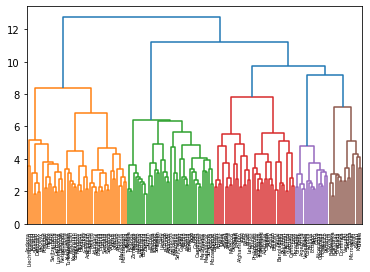

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import random
import numpy as np

Z = linkage(country_vector_matrix, method="ward", metric="euclidean")
dendrogram(Z, labels=countries)
plt.show()

## 69. t-SNEによる可視化
ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ．

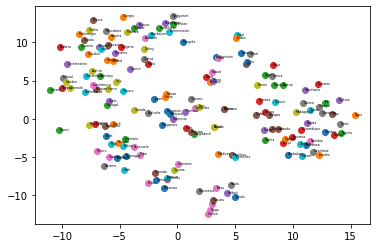

In [63]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

embedded_matrix = TSNE(n_components=2).fit_transform(country_vector_matrix)

for xy, country in zip(embedded_matrix,countries):
    plt.scatter(xy[0],xy[1])
    plt.annotate(country,xy=(xy[0],xy[1]),size=3)
plt.show()

In [67]:
from scipy.stats import rankdata
rankdata([0, 2, 10,3, 2,5,6],method='min')

array([1, 2, 7, 4, 2, 5, 6])